In [1]:
import sys
sys.path.append('/home/xiaohl/FHNW/STIX/gsw/sdcpy')
from collections import OrderedDict
from functools import partial
from stixdcpy import instrument as ins
import astropy.units as u
from stixdcpy import transmission as tr
import numpy as np
from astropy.table.table import Table
from roentgen.absorption.material import Compound, MassAttenuationCoefficient, Material
from matplotlib import pyplot as plt
from ipywidgets import interact, interact_manual, widgets

%matplotlib notebook


In [2]:
t=tr.Transmission(matlist='mean')

<IPython.core.display.Javascript object>


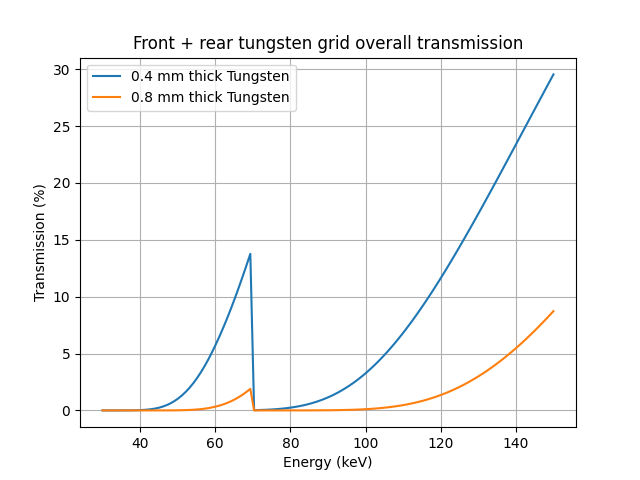

Compound(Compound(tungsten 0.4 mm 19280.0 kg / m3))
Compound(Compound(tungsten 0.8 mm 19280.0 kg / m3))


In [3]:
energies=np.linspace(30,150,120)
plt.figure()
factor1=t.get_transmission_of_component('single_grid', energies)
factor2=t.get_transmission_of_component('double_grid', energies)
plt.plot(energies, factor1*100, label='0.4 mm thick Tungsten')
plt.plot(energies, factor2*100, label='0.8 mm thick Tungsten')
plt.xlabel('Energy (keV)')
plt.ylabel('Transmission (%)')
#plt.xscale('log')
plt.legend()
plt.title('Front + rear tungsten grid overall transmission')
#plt.yscale('log')
plt.grid('on')

<IPython.core.display.Javascript object>


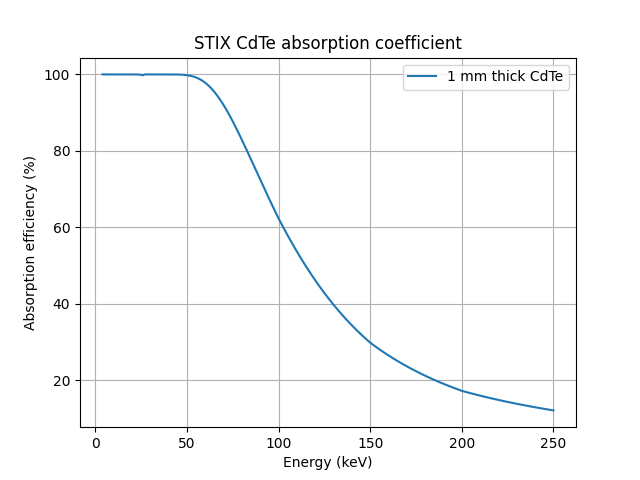

Compound(Compound(cdte 1.0 mm 5850.0 kg / m3))


In [4]:
ex=np.linspace(4,250,246)
plt.figure()
factor_cdte=t.get_transmission_of_component('caliste', ex)

plt.plot(ex, 100*(1-factor_cdte), '-', label='1 mm thick CdTe')

plt.xlabel('Energy (keV)')
plt.ylabel('Absorption efficiency (%)')
#plt.xscale('log')
plt.legend()
plt.title('STIX CdTe absorption coefficient')
#plt.yscale('log')
plt.grid('on')

In [20]:


def plot_trans(ax, label, detector_id,  att=False, matlist='old'):
    energies=np.linspace(3,150,10000)
    ebins=energies.reshape((-1,2))
    stran=tr.Transmission(matlist=matlist)
    factors=stran.get_detector_transmission(detector_id,
                                  ebins, attenuator=att)
    ex=np.mean(ebins,axis=1)
    ax.plot(ex, factors*100, label=label)
    return factors




<IPython.core.display.Javascript object>


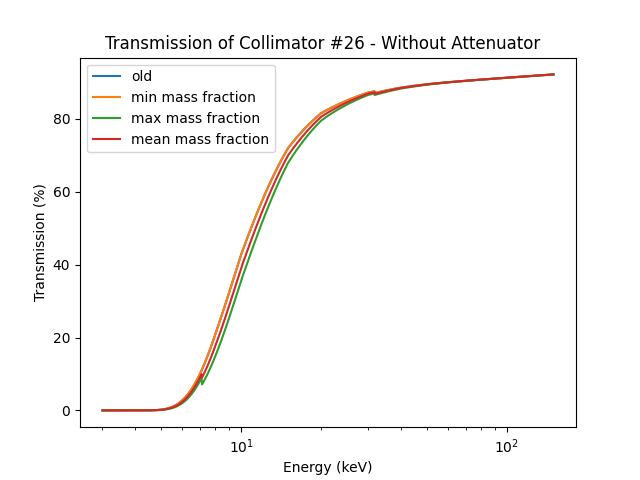

In [27]:
_, ax=plt.subplots()
detector=26
att=False
fold=plot_trans(ax, 'old', detector, att, 'old')
fmin=plot_trans(ax, 'min mass fraction', detector, att, 'min')
fmax=plot_trans(ax, 'max mass fraction', detector, att, 'max')
fmean=plot_trans(ax, 'mean mass fraction', detector, att, 'mean')
ax.set_xlabel('Energy (keV)')
ax.legend()
ax.set_ylabel('Transmission (%)')
#ax.set_yscale('log')
ax.set_title(f'Transmission of Collimator #{detector} - Without Attenuator  ')
ax.set_xscale('log')

In [28]:
np.max(fmin-fmax)

0.07137356592152594

<IPython.core.display.Javascript object>


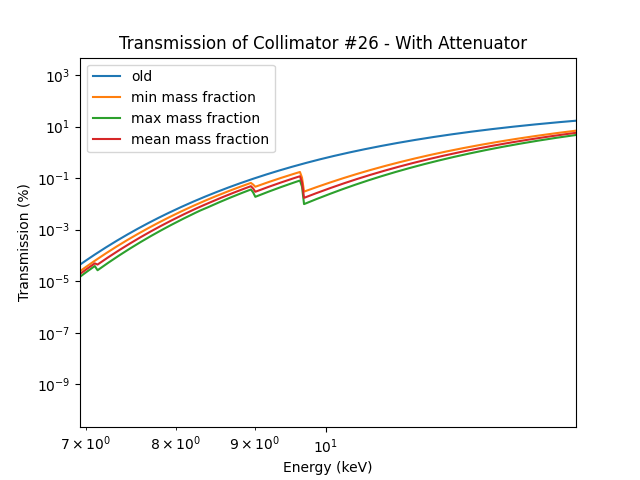

attenuator included
attenuator included
attenuator included
attenuator included


In [33]:
_, ax=plt.subplots()
detector=26
att=True
fold=plot_trans(ax, 'old', detector, att, 'old')
fmin=plot_trans(ax, 'min mass fraction', detector, att, 'min')
fmax=plot_trans(ax, 'max mass fraction', detector, att, 'max')
fmean=plot_trans(ax, 'mean mass fraction', detector, att, 'mean')
ax.set_xlabel('Energy (keV)')
ax.legend()
ax.set_ylabel('Transmission (%)')
ax.set_yscale('log')
ax.set_title(f'Transmission of Collimator #{detector} - With Attenuator  ')
ax.set_xscale('log')

In [32]:
np.max(fmax/fold)

0.9979693946957324

<IPython.core.display.Javascript object>


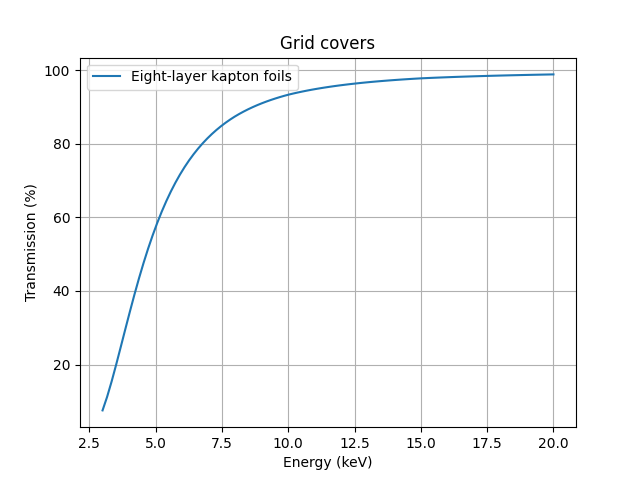

Compound(Compound(kapton 0.15239999999999998 mm 1430.0 kg / m3))


In [7]:
#transmission of grid cover
plt.figure()
energies=np.linspace(3,20,100)
factor=t.get_transmission_of_component('dem', energies)
plt.plot(energies, factor*100, label='Eight-layer kapton foils')
plt.xlabel('Energy (keV)')
plt.ylabel('Transmission (%)')
#plt.xscale('log')
plt.legend()
plt.title('Grid covers')
#plt.yscale('log')
plt.grid('on')